## Import Packages

In [105]:
# Import packages
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import deep_transit as dt
from lightkurve.correctors import CBVCorrector



import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## Examining Data

In [106]:
model_path = 'models/model_Kepler.pth' #se carga el modelo de deep learning

In [107]:
def transit_candidates(kepid, quarter = None): #genera un objeto lightkurve a partir del id de la mision kepler
    pixelFile = lk.search_targetpixelfile("KIC " + str(kepid), quarter = quarter, exptime='long').download(quality_bitmask = "hard")
    pixelFile.plot() 
    lc = pixelFile.to_lightcurve(aperture_mask = pixelFile.pipeline_mask)
    lc= lc
    lc.plot()
    lc.scatter()
    return lc

In [108]:
def period(lc, days = 10): #busca el periodo de un objeto lightkurve
    period = np.linspace(1, days, 100000)
    bls = lc.to_periodogram(method='bls', period = period, frequency_factor = 10000) 
    bls.plot()

    planet_b_period = bls.period_at_max_power
    planet_b_t0 = bls.transit_time_at_max_power
    planet_b_dur = bls.duration_at_max_power

    print(planet_b_period)
    print(planet_b_t0)
    print(planet_b_dur)

    planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

    planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)


    return planet_b_period, planet_b_mask, planet_b_model

In [109]:
def folded(flat_lc, period):   #entrega un objeto lightkurve folded
    flat_lc.plot()
    folded_lc = flat_lc.fold(period = period)
    folded_lc.plot()

In [110]:
def deep_transit(lc): #modelo de deeplearning
    dt_obj = dt.DeepTransit(lc, is_flat=False)
    bboxes = dt_obj.transit_detection(model_path, batch_size=2, confidence_threshold=0.6, nms_iou_threshold=0.1, device_str='auto', backend='pytorch')
    detrended_lc = dt.detrend_light_curve(lc)
    dt.plot_lc_with_bboxes(detrended_lc, bboxes, ms=3, marker='o')

In [111]:
def deep_transit_candidates(kepid, quarter = None): #objeto de lightkurve para analizar candidatos y luego llama al deep learning
    pixelFile = lk.search_targetpixelfile("KIC " + str(kepid), quarter = quarter, exptime='long').download(quality_bitmask = "hard")
    lc = pixelFile.to_lightcurve(aperture_mask = pixelFile.pipeline_mask)
    deep_transit(lc)

In [112]:
candidates = [12105051, 9729691, 2307199, 9427402, 9636135, 9017682, 5031857, 7750419, 7984047] #candidatos obtenidos por el modelo deep learning

In [113]:
candidato = candidates[0]
print(lk.search_targetpixelfile("KIC " + str(candidato), exptime='long'))

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr012105051      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr012105051      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr012105051      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr012105051      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr012105051      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr012105051      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr012105051      0.0
  7 Kepler Quarter 08 2011 Kepler    1800 kplr012105051      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr012105051      0.0
  9 Kepler Quarter 10 2011 Kepler    1800 kplr012105051      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr012105051      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr0

c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


4it [00:01,  2.06it/s]                       
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


8it [00:03,  2.00it/s]                       
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


8it [00:03,  2.06it/s]                       
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


8it [00:04,  1.72it/s]                       
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:04<00:00,  1.63it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:04<00:00,  1.86it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 6/6 [00:03<00:00,  1.65it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:03<00:00,  2.12it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


8it [00:03,  2.06it/s]                       
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


8it [00:03,  2.08it/s]                       
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:04<00:00,  1.99it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 6/6 [00:02<00:00,  2.05it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


4it [00:01,  2.02it/s]                       


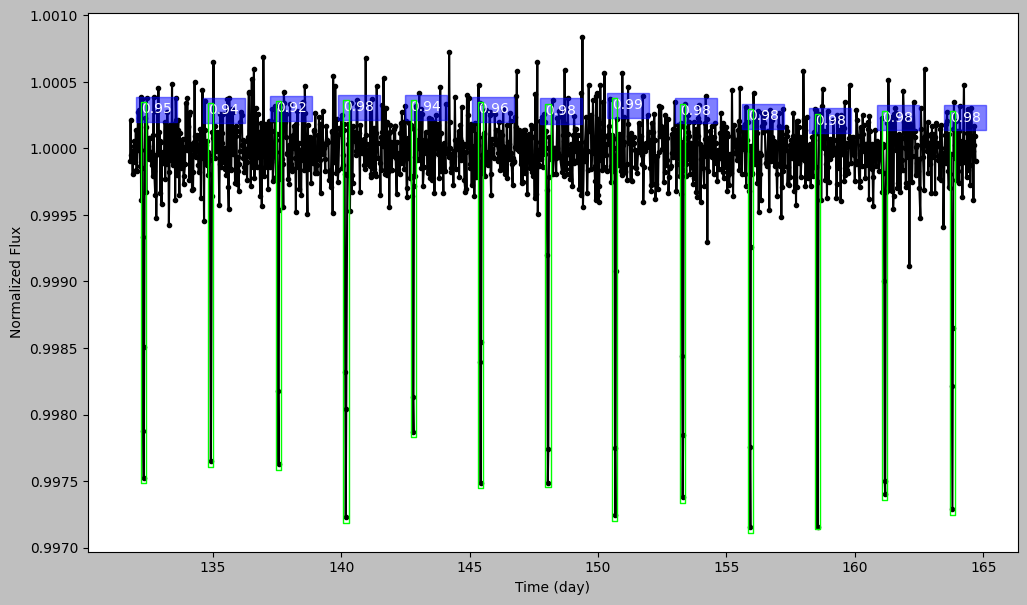

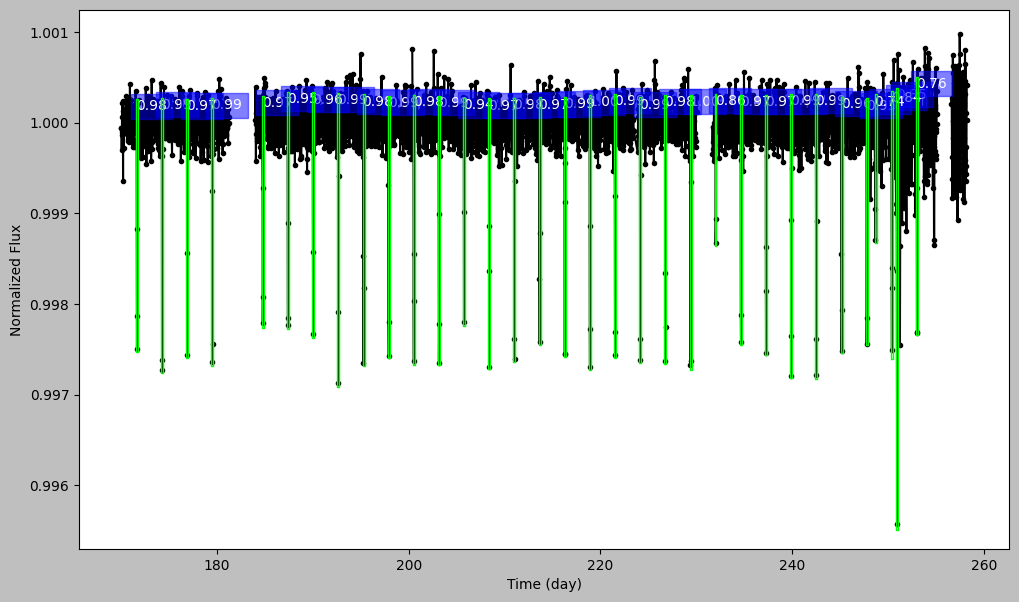

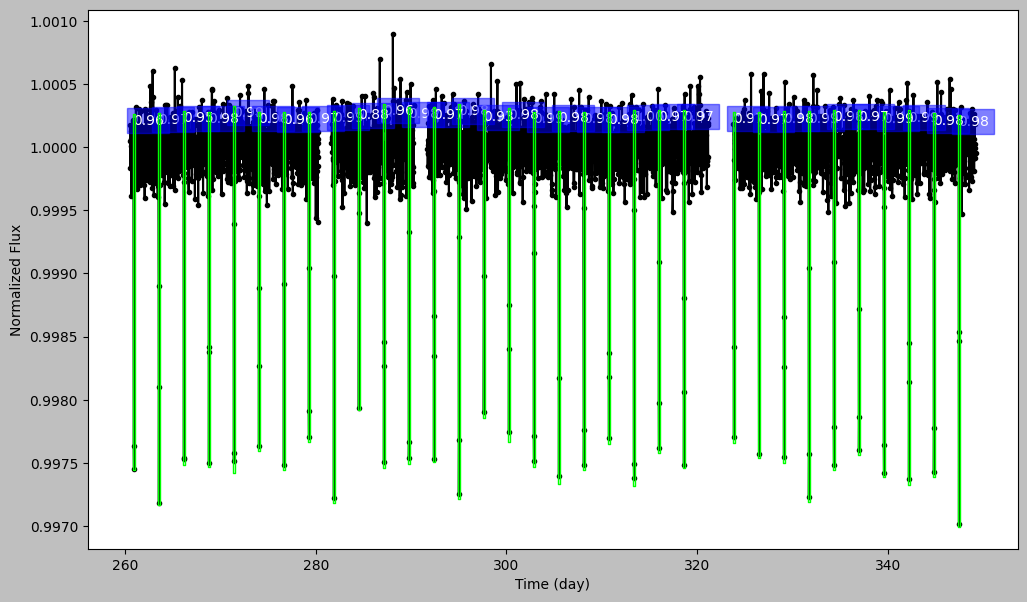

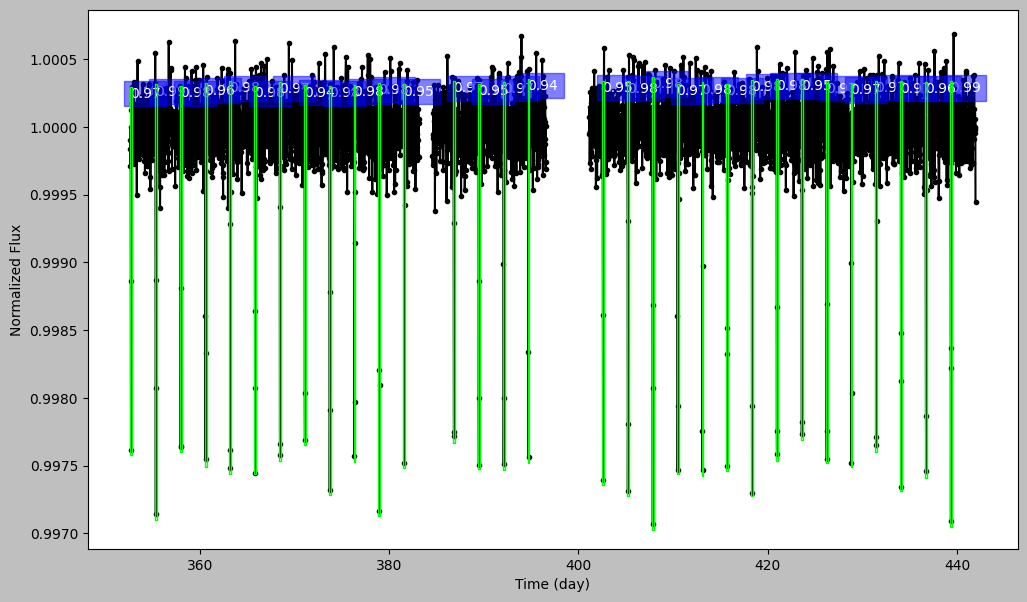

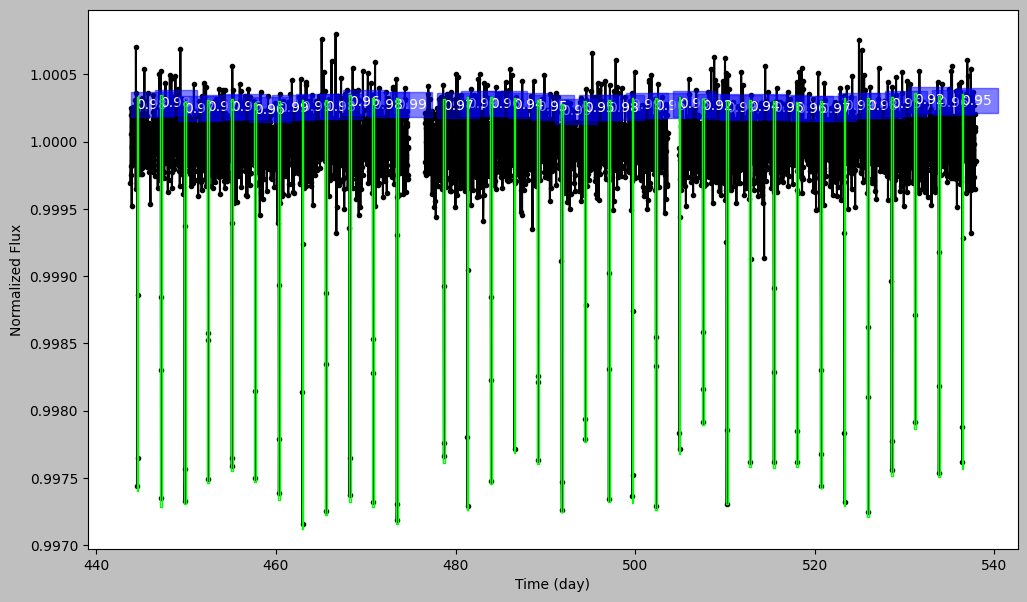

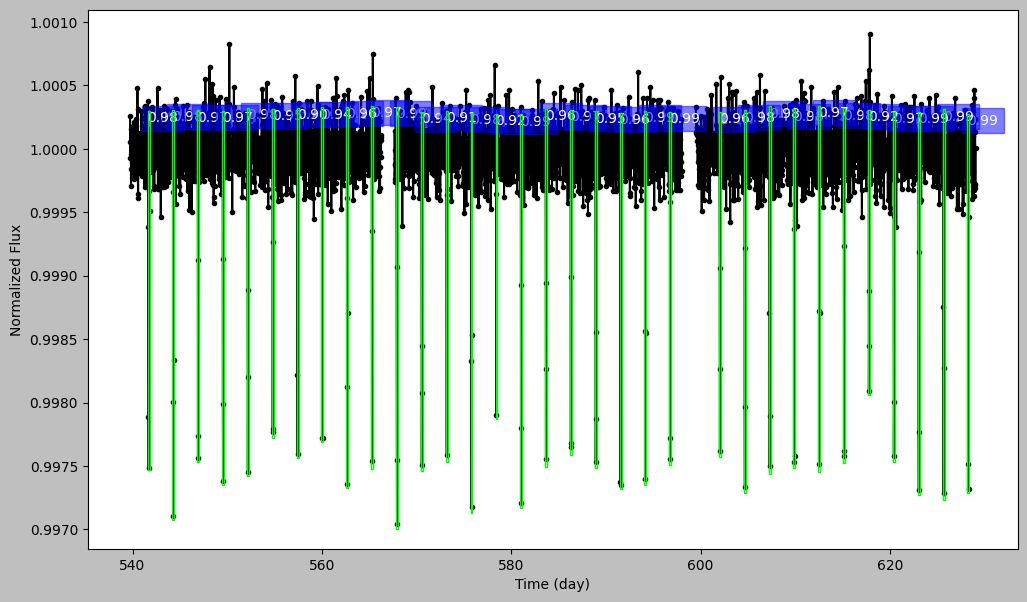

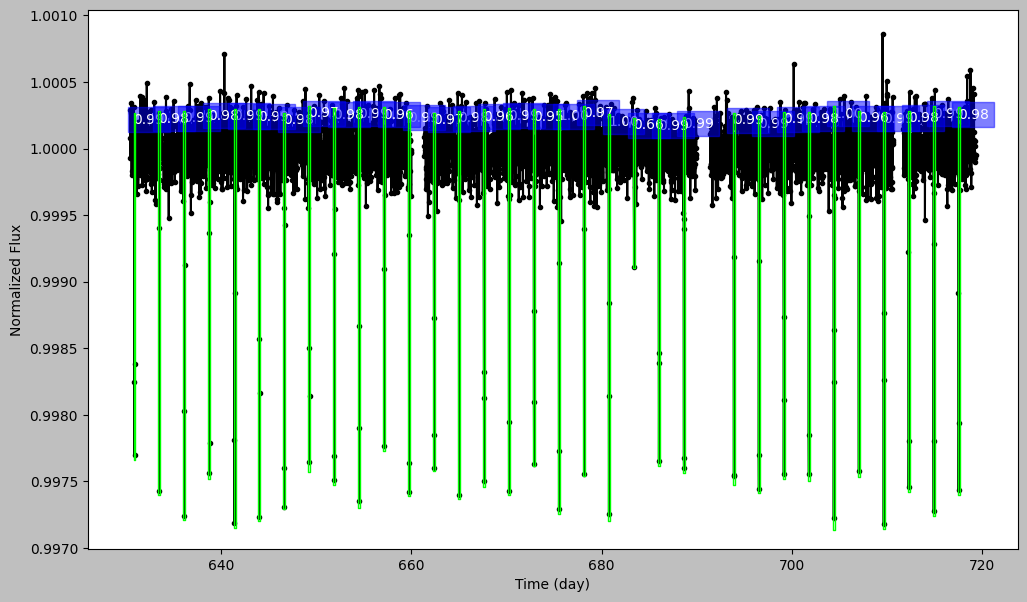

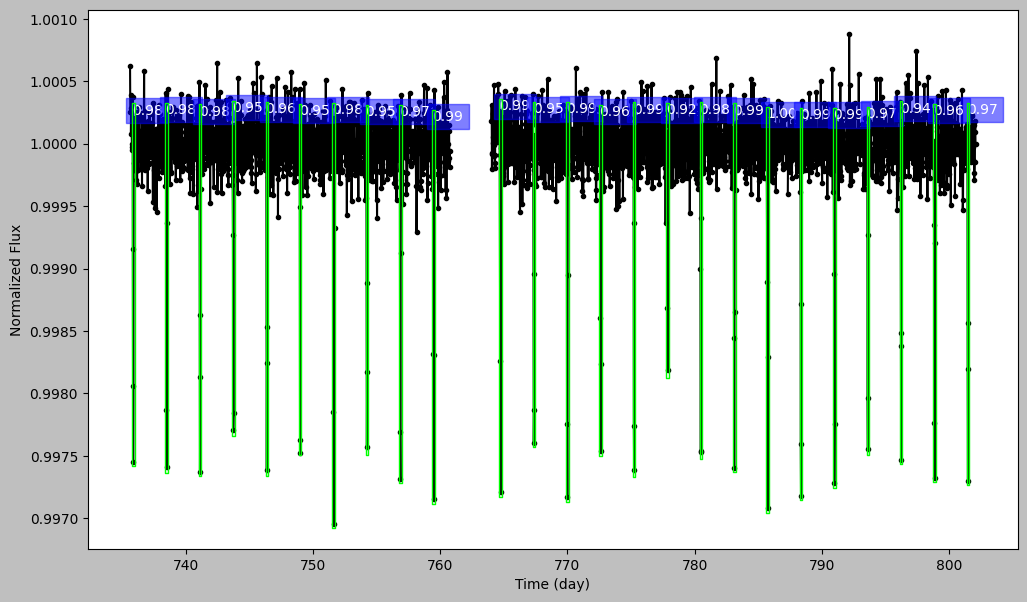

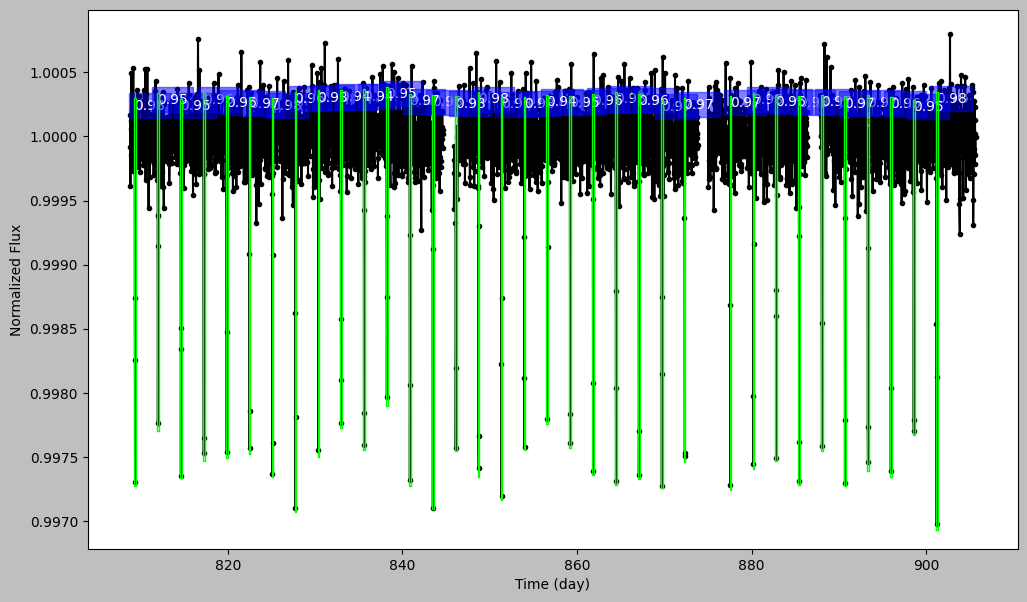

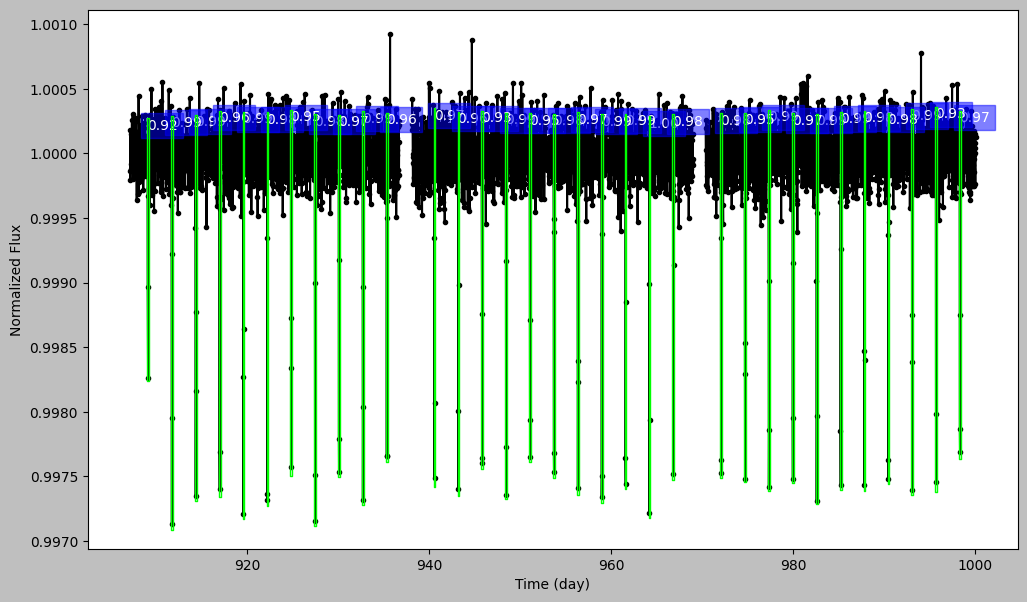

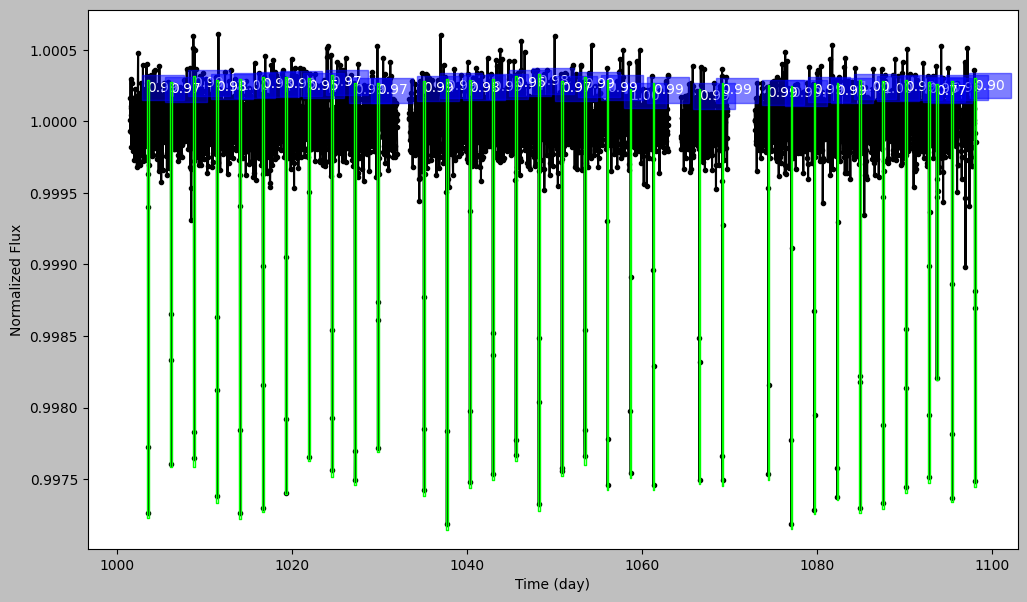

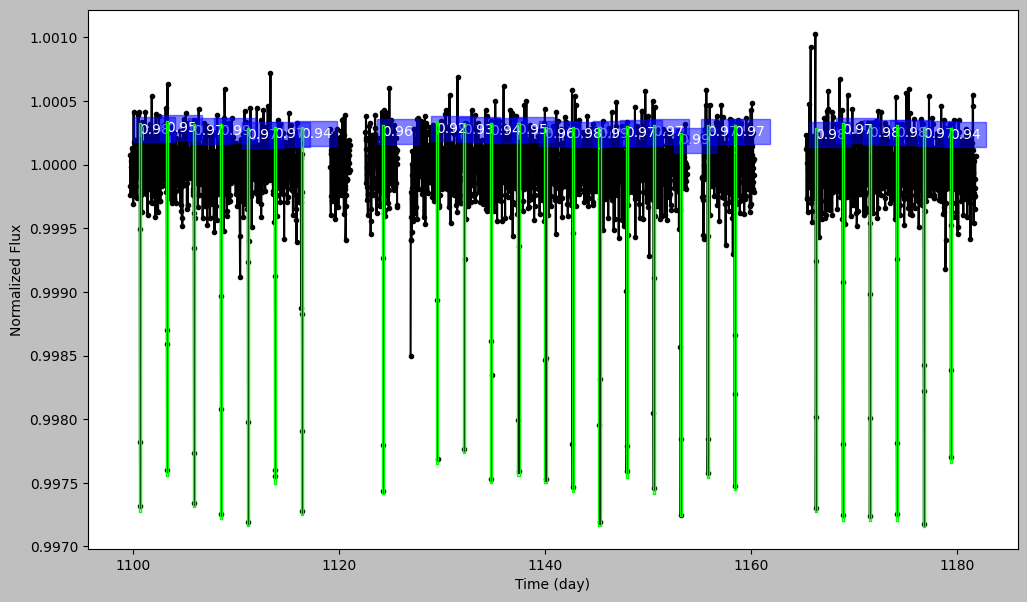

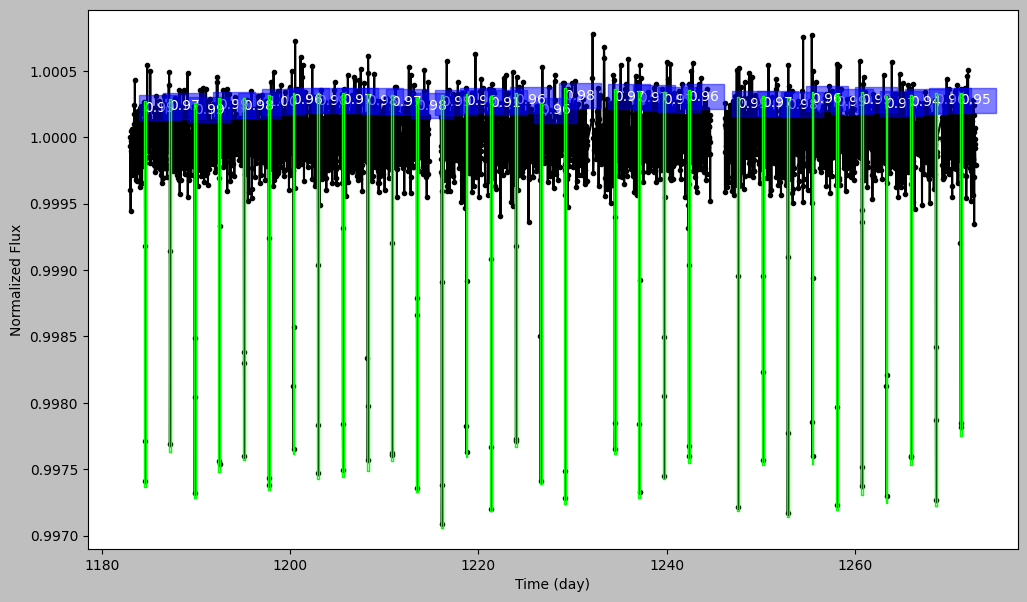

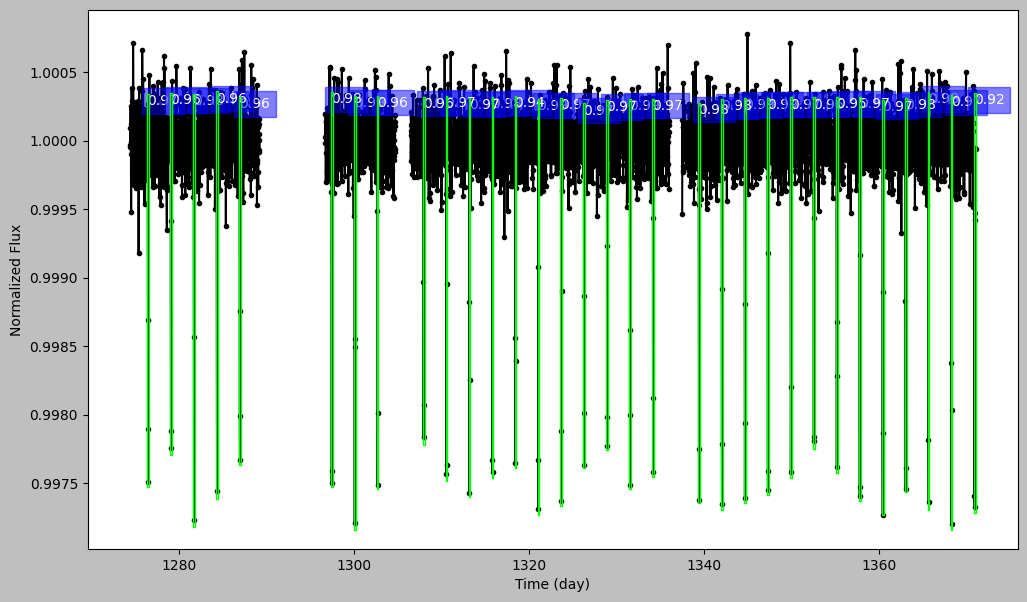

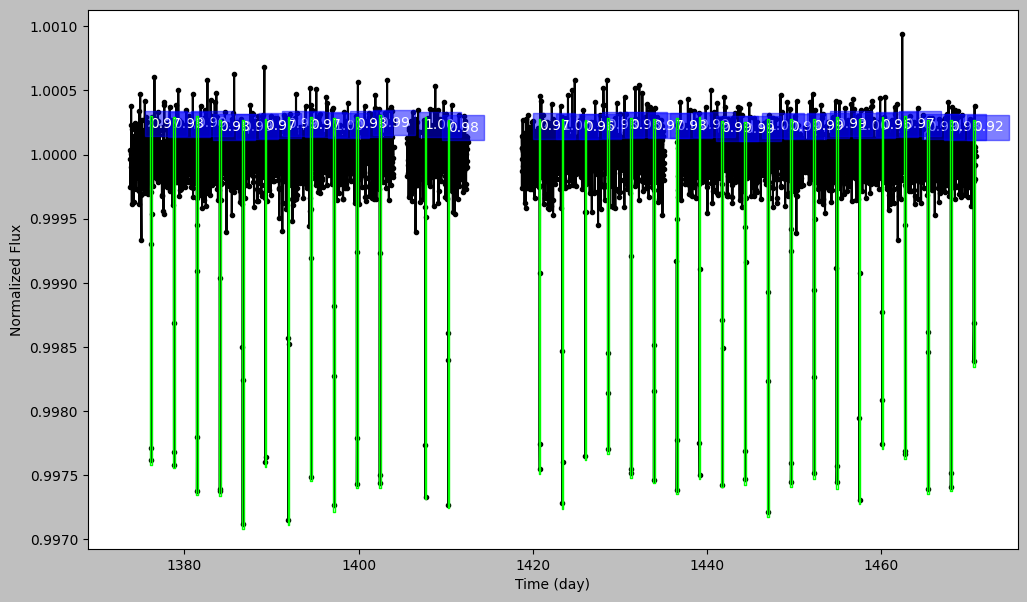

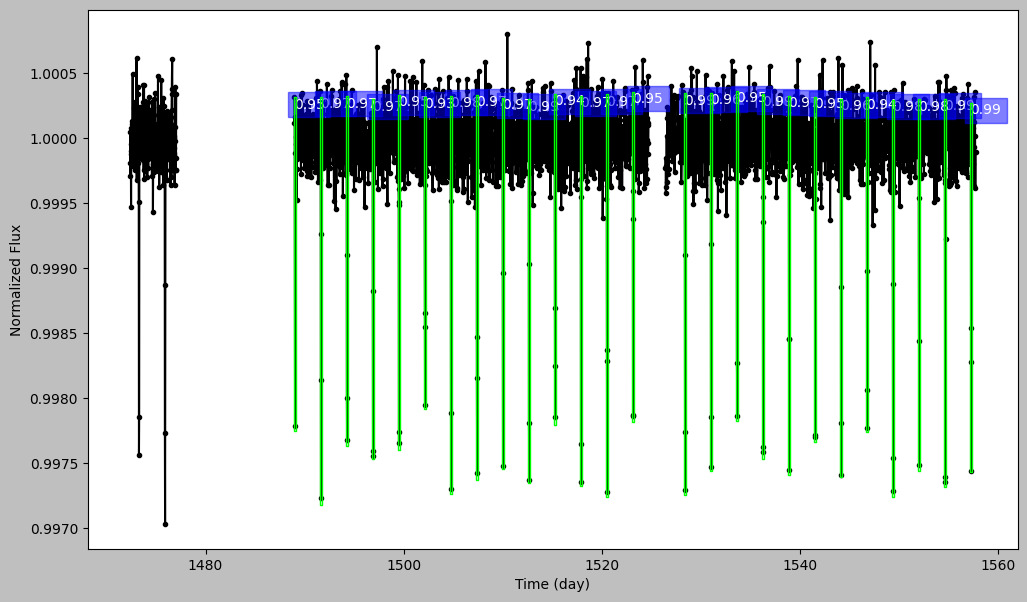

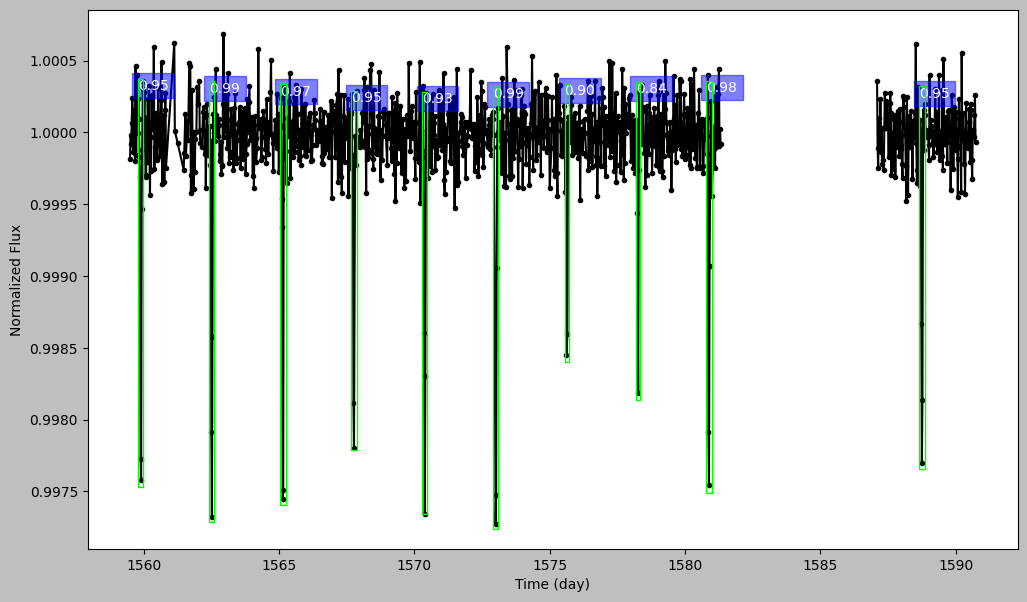

In [114]:
quarters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
for quarter in quarters:
    deep_transit_candidates(candidato, quarter)

Codigo comentado y no en uso es para casos donde hay 2 planetas en orbitando una estrella, el cual en mi analisis no parece ser el caso

Se analiza en alto detalle el candidato numero 1 de la lista, elegido tras analizar a mano los resultados del modelo deep learning entre los resultados del machine learning de la mision kepler "cumulative.csv"

Over fitting Metric: 0.20036071642062667
Under fitting Metric: 0.9999976504003684
2.6238862388623883 d
132.30716946422936
0.05 d


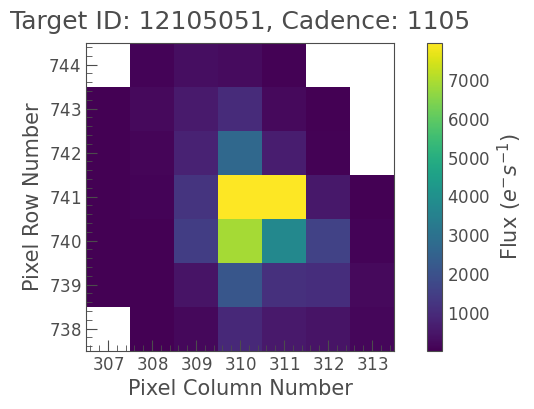

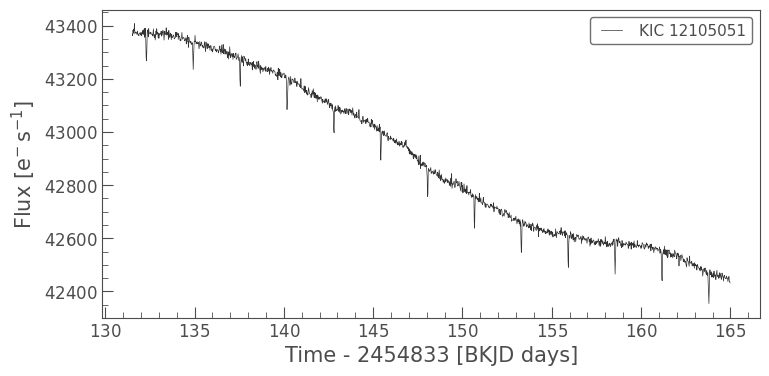

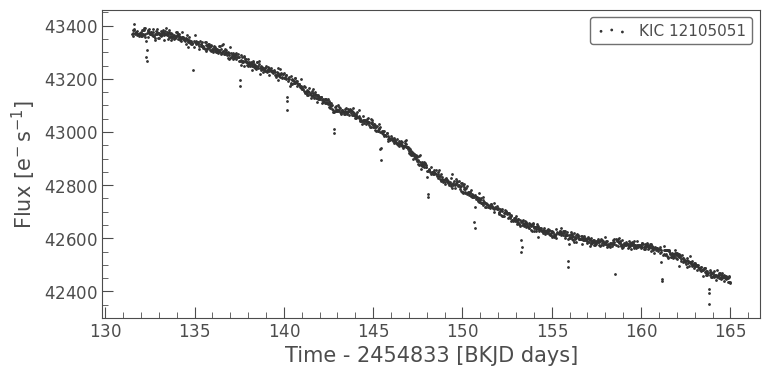

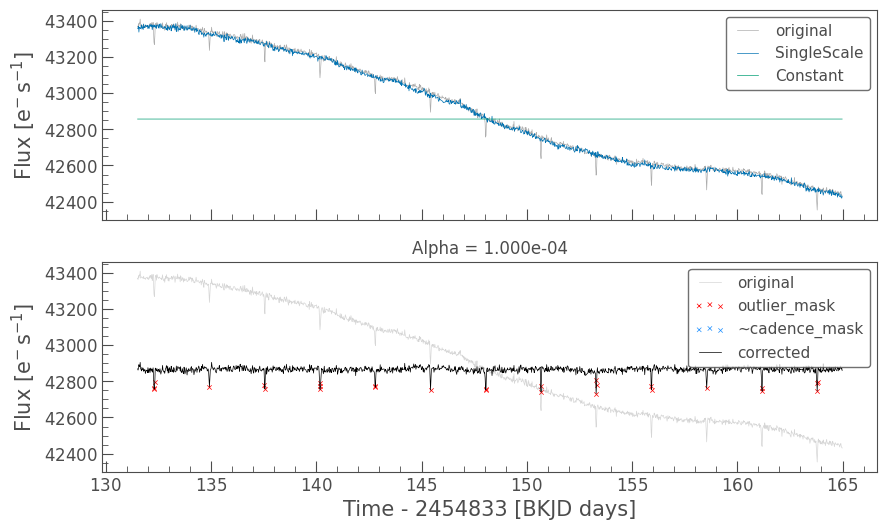

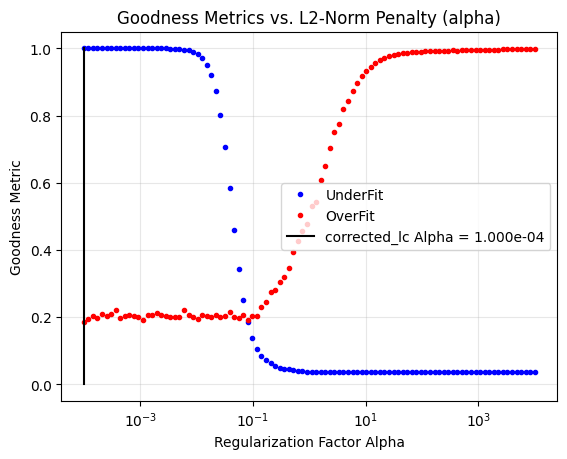

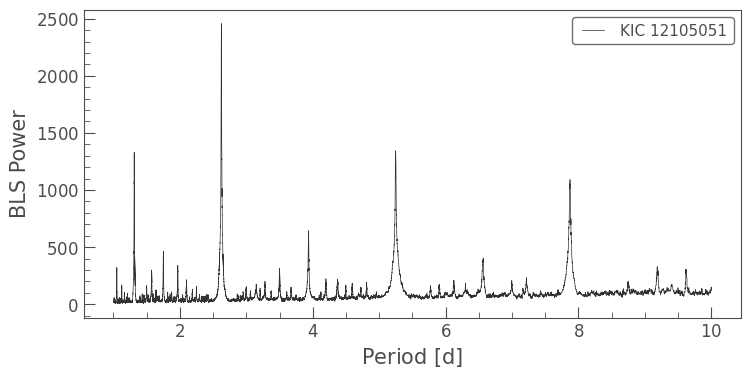

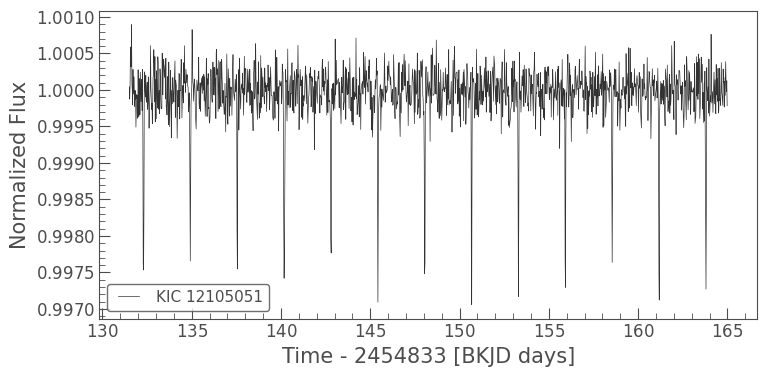

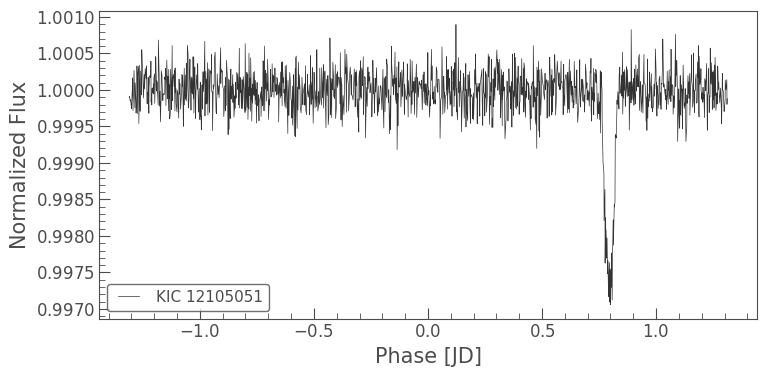

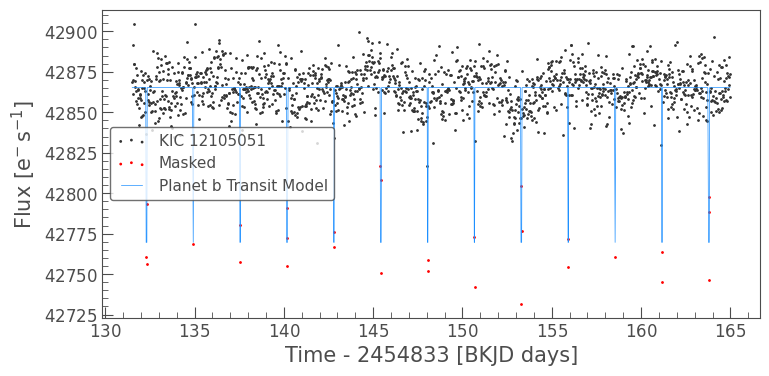

In [115]:
lc = transit_candidates(candidates[0], quarter = 1)
cbvCorrector = CBVCorrector(lc)
cbv_type = ['SingleScale']
cbv_indices = [np.arange(1,9)]
cbvCorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, alpha = 1e-4)
cbvCorrector.diagnose()
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices)
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))
lc = cbvCorrector.corrected_lc
lc_flat = lc.flatten()
planet_b_period, planet_b_mask, planet_b_model = period(lc,10)
folded(lc_flat, planet_b_period)


masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter()
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked')

#period = np.linspace(1, 500, 10000)
#bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
#bls.plot()

#planet_c_period = bls.period_at_max_power
#planet_c_t0 = bls.transit_time_at_max_power
#planet_c_dur = bls.duration_at_max_power

#ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
#masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          #label='Binned Flux')
#ax.set_xlim(-5, 5);

#planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       #transit_time=planet_c_t0,
                                       #duration=planet_c_dur)
planet_b_model.plot(ax=ax, c='dodgerblue', label='Planet b Transit Model');
#planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model');